# Canine Cutaneous Tumor Classification

## Import packages

In [1]:
import sys 
sys.path.insert(0, '..')
from slide.process_slides import *
from fastai.vision import *
from torchvision import transforms

## Helper function to display patch-level results

In [2]:
def show_patch_results (learn, device, image_container, x_min, y_min, level, patch_size):
    label_dict = {7:'Melanoma', 8:'Plasmacytoma', 9:'Mast Cell Tumor', 10:'PNST', 11:'SCC', 12:'Trichoblastoma', 13:'Histiocytoma'}
    image = np.array(image_container.slide.read_region(location=(x_min, y_min), level=level, size=(patch_size, patch_size)))[:, :, :3]
    patch = pil2tensor(image / 255., np.float32)
    patch = transforms.Normalize(*learn.data.stats)(patch)
    gt = label_dict[image_container.labels[0]]


    with torch.no_grad():
        prediction = learn.model.eval()(torch.stack([patch]).to(device=device))
        prediction = torch.softmax(prediction, dim=1)
        prediction = prediction.argmax(dim=1)[None]
        prediction = np.squeeze(prediction.cpu(), 0)
        prediction = learn.data.classes[int(prediction)]

        _, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
        ax.set_title("GT: {} \n Prediction: {}".format(gt,prediction))
        plt.axis('off')
        ax.imshow(image)

## Define model input parameters

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
patch_size = 1024
level = 0

## Define paths of slide folder and annotation JSON

In [4]:
target_folder = Path("E:/Slides/Canine Skin Tumors")
annotation_file = "E:/skin_tumors.json"

## Define dict to match annotation classes to classes used for training

In [5]:
label_dict = {'Bg': -1, 'Bone': -1, 'Cartilage': -1, 'Dermis': -1, 'Epidermis': -1, 'Subcutis': -1,'Inflamm/Necrosis': -1,'Melanoma': 0, 'Plasmacytoma': 1, 'Mast Cell Tumor': 2, 'PNST': 3, 'SCC': 4, 'Trichoblastoma': 5,'Histiocytoma': 6}

## Load slide in custom SlideContainer format

In [6]:
slide = SlideContainer(Path(str(target_folder) + "/PNST/1654_16a_PNST_MF.svs"),annotation_file, level, patch_size, patch_size, dataset_type='classification', label_dict=label_dict)

## Load learner

In [7]:
classification_learner = load_learner(Path("../models"), "xception_0_sdata.pkl")

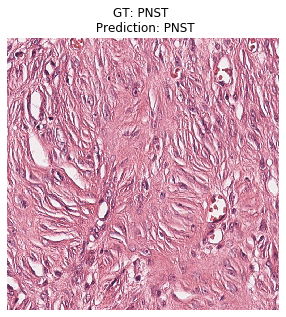

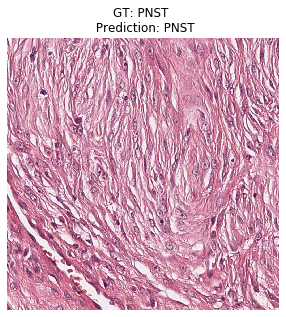

In [8]:
show_patch_results(classification_learner, device, slide, 80000, 60000, level, patch_size)
show_patch_results(classification_learner, device, slide, 90000, 50000, level, patch_size)